### 1. Carry out descriptive analytics on the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('dataset w7.csv')
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [2]:
#checking null values
df.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [3]:
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


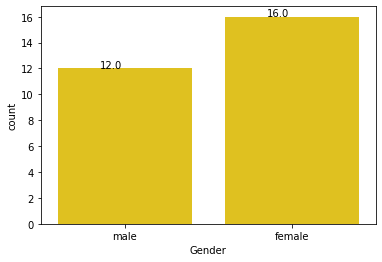

In [5]:
#ploting the gender values in a bar graph
ax=sns.countplot(x ='Gender', data = df,color='gold')
#getting value counts of each types 
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

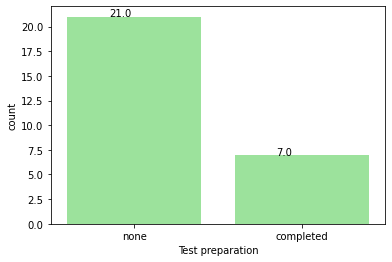

In [6]:
bx=sns.countplot(x ='Test preparation', data = df,color='lightgreen')
for p in bx.patches:
   bx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

ploting the students test preparation acording to gender

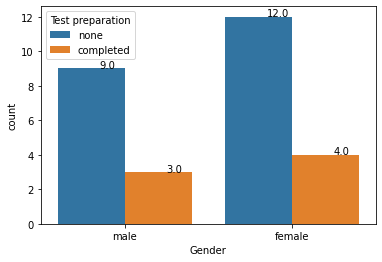

In [7]:
cx=sns.countplot(x='Gender',data=df,hue='Test preparation')
for p in cx.patches:
   cx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

### 2. Check whether female and male students scored the same marks.

### Hypothesis statements
H0(null hypothesis) : female and male students didnot scored the same marks

Ha(alternate hypothesis) : female and male students scored the same marks

In [8]:
#Checking the difference in totalmarks between male and female
a=df[['Gender','Total Marks']].groupby('Gender').sum()
a

,Total Marks
Gender,
female,540
male,365


In [9]:
from scipy.stats import ttest_ind
#getting male and female value list
f=df[df['Gender']=='female']['Total Marks']
m=df[df['Gender']=='male']['Total Marks']
#assume alpha value as 0.05 for 5% significance  
alpha=0.05  
#find the p value
ttest_ind(f,m)

Ttest_indResult(statistic=0.6940885268848668, pvalue=0.4937822317960763)

In [10]:
_,p=ttest_ind(f,m)
print('p value :', p)
if p>alpha:
    print('Failing to reject H0')
else:
    print('Reject H0')

p value : 0.4937822317960763
Failing to reject H0


Failing to reject H0 means female and male students didnot scored the same marks

### 3. Whether test preparation helps the students? 

In [12]:
#getting the mean deviation and other related values
df[['Test preparation','Total Marks']].groupby('Test preparation').describe()

Total Marks                                                \
                       count       mean        std   min   25%   50%   75%   
Test preparation                                                             
completed                7.0  44.571429   3.359422  40.0  43.0  44.0  46.0   
none                    21.0  28.238095  11.661495  12.0  18.0  27.0  38.0   

                        
                   max  
Test preparation        
completed         50.0  
none              48.0

### Hypothesis statements
H0(null hypothesis) : test preparation didnot helps the students

Ha(alternate hypothesis) : test preparation helps the students

In [14]:
completed=df[df['Test preparation']=='completed']['Total Marks']
none=df[df['Test preparation']=='none']['Total Marks']
_,p=ttest_ind(completed,none)
print('p value :', p)
if p>alpha:
    print('Failing to reject H0')
else:
    print('Reject H0') 

p value : 0.0012671292457320106
Reject H0


Rejection of null hypothesis states test preparation has helped the students